Imports

In [1]:
import tensorflow as tf
import os

In [3]:
# Update the imports
import tensorflow as tf
print("TensorFlow vcersion:",tf.__version__)

TensorFlow vcersion: 2.17.0


In [2]:
# chck for the number of cpus
gpus = tf.config.experimental.list_physical_devices("GPUS")
len(gpus)

0

In [3]:
import cv2
import imghdr

C:\Users\User\AppData\Local\Temp\ipykernel_17480\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = 'data'
# os.listdir(os.path.join(data_dir,'images_sad'))
os.listdir(data_dir)

['images_happy', 'images_sad']

In [5]:
# Check on image types

image_exts = ['jpeg','jpg','bmp','png']
image_exts

['jpeg', 'jpg', 'bmp', 'png']

REMOVE DODGY IMAGES

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [7]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [14]:
# imports update
import numpy as np
import matplotlib.pyplot as plt

In [9]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [32]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 259 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [16]:
# image representation as numpy arrays

batch = data_iterator.next()
# class 0 = happy people
# class 1 = sad people
batch[1]

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1])

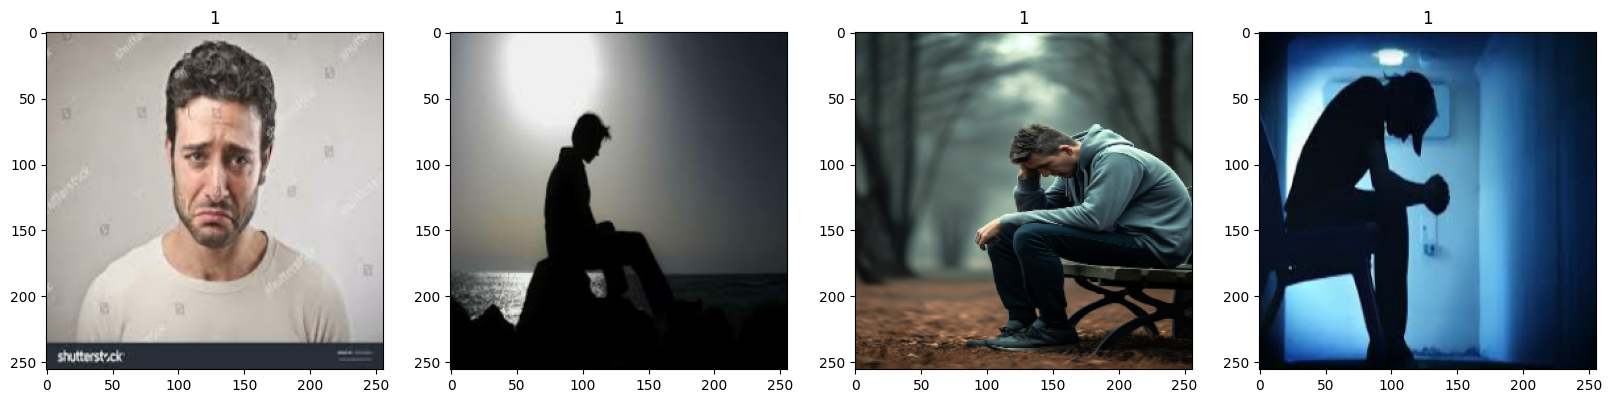

In [17]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [33]:
# scaling the data to  0-1 (Normalization)
data = data.map(lambda x,y : (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

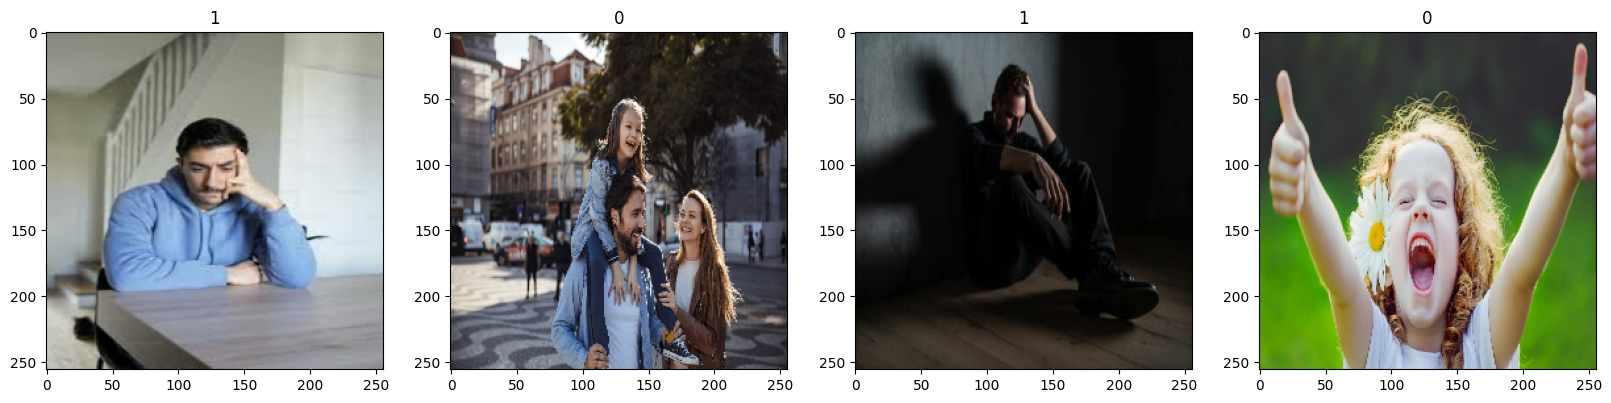

In [35]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [59]:
len(data)

9

In [49]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [53]:
train_size + val_size + test_size

9

In [54]:
# spit the data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + test_size).take(test_size)

MODEL BUILDING 

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [62]:
model = Sequential()

In [63]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

MODEL TRAINING

In [70]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [71]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 993ms/step - accuracy: 0.5293 - loss: 1.1573 - val_accuracy: 0.6094 - val_loss: 0.6510
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 941ms/step - accuracy: 0.5552 - loss: 0.6495 - val_accuracy: 0.7656 - val_loss: 0.6341
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 846ms/step - accuracy: 0.6990 - loss: 0.6200 - val_accuracy: 0.8906 - val_loss: 0.4732
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 901ms/step - accuracy: 0.7802 - loss: 0.5383 - val_accuracy: 0.6250 - val_loss: 0.6161
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 878ms/step - accuracy: 0.7288 - loss: 0.4646 - val_accuracy: 0.9062 - val_loss: 0.3988
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 975ms/step - accuracy: 0.8748 - loss: 0.3569 - val_accuracy: 0.8906 - val_loss: 0.2891
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 894ms/step - accuracy: 0.8769 - loss: 0.2901 - val_accuracy: 0.9375 - val_loss: 0.2390
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9431 - loss: 0.2251 - val_accuracy: 0.8750 - val_loss: 0.2784
Epoch 

PLOT PERFORMANCE

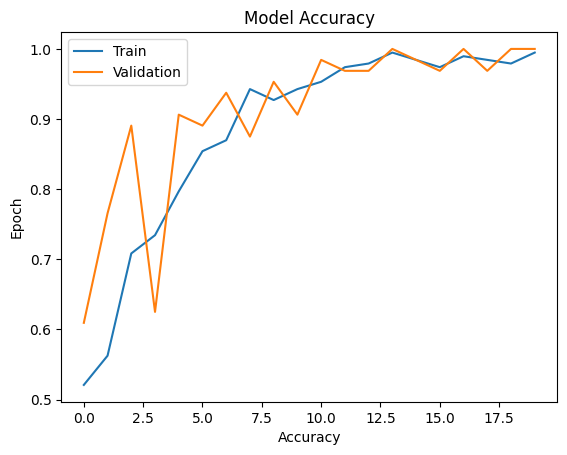

In [72]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

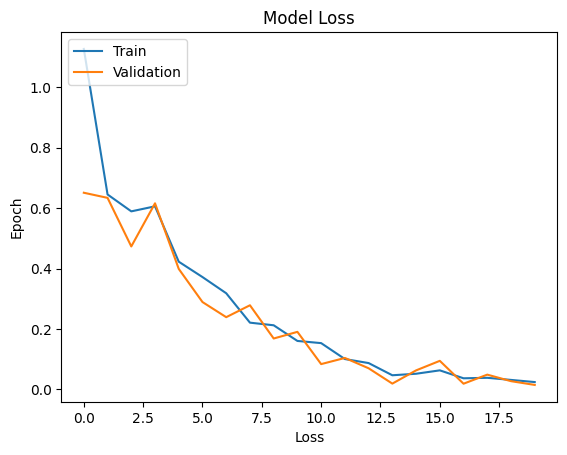

In [73]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

EVALUATE MODEL

In [82]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pre = Precision()
re = Recall()
acc =BinaryAccuracy()

In [77]:
for batch in test.as_numpy_iterator():
    X,y = batch
    ypred = model.predict(X)
    pre.update_state(y,ypred)
    re.update_state(y,ypred)
    acc.update_state(y,ypred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


In [80]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


TESTING THE MODEL

<function matplotlib.pyplot.show(close=None, block=None)>

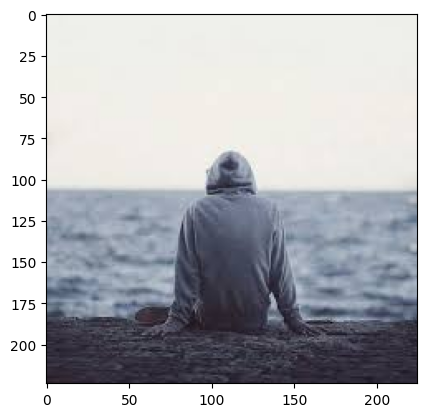

In [99]:
img = cv2.imread('images.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

In [100]:
img.shape

(224, 225, 3)

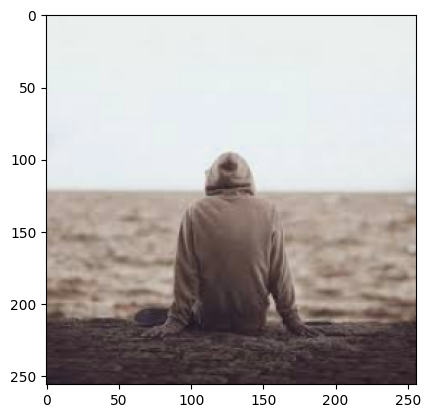

In [101]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [102]:
resize.shape

TensorShape([256, 256, 3])

In [103]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [104]:
y_pred= model.predict(np.expand_dims(resize/255, 0))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[0.6500648]], dtype=float32)

In [105]:
if y_pred > 0.5:
    print("The predicted image is a sad person (SAD)")
else:
    print("The predicted image is a happy person (HAPPY)")

The predicted image is a sad person (SAD)


SAVE THE MODEL

In [106]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models', 'happysadmodel.h5'))
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

y_predNew = new_model.predict(np.expand_dims(resize/255,0))

if y_pred > 0.5:
    print("The predicted image is a sad person (SAD)")
else:
    print("The predicted image is a happy person (HAPPY)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
The predicted image is a sad person (SAD)
